In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [75]:
playas = pd.read_pickle('player_season_totals.pickle')

In [76]:
df = pd.DataFrame(playas, columns=playas[0].keys())

In [77]:
df=df.sort_values(by=['player','season']).reset_index().drop('index',axis=1)

In [78]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [79]:
df

,player,age,team_id,lg_id,per,gs,ws,season,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct
0,A.C. Green,22,LAL,NBA,11.8,1,3.3,1985-86,82,1542,209,388,208,382,1,6,102,167,160,221,381,54,49,49,99,229,521,0.539,0.545,0.167,0.540,0.611,0.564
1,A.C. Green,23,LAL,NBA,15.7,72,7.6,1986-87,79,2240,316,587,316,582,0,5,220,282,210,405,615,84,70,80,102,171,852,0.538,0.543,0.000,0.538,0.780,0.599
2,A.C. Green,24,LAL,NBA,14.5,64,7.9,1987-88,82,2636,322,640,322,638,0,2,293,379,245,465,710,93,87,45,120,204,937,0.503,0.505,0.000,0.503,0.773,0.581
3,A.C. Green,25,LAL,NBA,17.8,82,9.4,1988-89,82,2510,401,758,397,741,4,17,282,359,258,481,739,103,94,55,119,172,1088,0.529,0.536,0.235,0.532,0.786,0.594
4,A.C. Green,26,LAL,NBA,14.7,82,7.7,1989-90,82,2709,385,806,372,760,13,46,278,370,262,450,712,90,66,50,116,207,1061,0.478,0.489,0.283,0.486,0.751,0.548
5,A.C. Green,27,LAL,NBA,13.8,21,6.1,1990-91,82,2164,258,542,247,487,11,55,223,302,201,315,516,71,59,23,99,117,750,0.476,0.507,0.200,0.486,0.738,0.556
6,A.C. Green,28,LAL,NBA,16.7,53,8.8,1991-92,82,2902,382,803,370,747,12,56,340,457,306,456,762,117,91,36,111,141,1116,0.476,0.495,0.214,0.483,0.744,0.556
7,A.C. Green,29,LAL,NBA,16.3,55,8.6,1992-93,82,2819,379,706,363,660,16,46,277,375,287,424,711,116,88,39,116,149,1051,0.537,0.550,0.348,0.548,0.739,0.603
8,A.C. Green,30,PHO,NBA,17.0,55,9.3,1993-94,82,2825,465,926,457,891,8,35,266,362,275,478,753,137,70,38,100,142,1204,0.502,0.513,0.229,0.506,0.735,0.555
9,A.C. Green,31,PHO,NBA,14.2,52,6.7,1994-95,82,2687,311,617,268,490,43,127,251,343,194,475,669,127,55,31,114,146,916,0.504,0.547,0.339,0.539,0.732,0.596


In [80]:
# https://help.yahoo.com/kb/fantasy-basketball/default-league-settings-fantasy-basketball-sln6919.html
# yahoo's fantasy scoring system
pts = 1
reb = 1.2
ast = 1.5
blk = 3
stl = 3
tov = -1

In [81]:
df['ftsy_pts']=(df.pts*1)+(df.trb*1.2)+(df.ast*1.5)+(df.blk*3)+(df.stl*3)-(df.tov)

In [82]:
df = df.merge(df.groupby('player').min()[['age']],how='left', left_on='player', right_index=True, suffixes=('','_min'))

In [83]:
df['experience'] = df.age - df.age_min

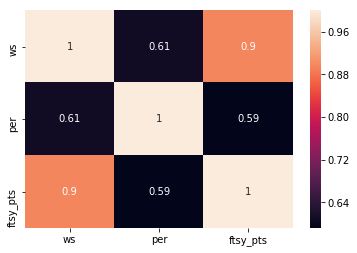

In [89]:
# plt.figure(figsize=(20,18))
sns.heatmap(df[['ws','per','ftsy_pts']].corr(), annot=True)
plt.show()

Win shares (ws) have a much higher correlation to fantasy points than player efficiency rating (per)

Thus predict win share to project next season performance

In [85]:
df.columns

Index(['player', 'age', 'team_id', 'lg_id', 'per', 'gs', 'ws', 'season', 'g',
       'mp', 'fg', 'fga', 'fg2', 'fg2a', 'fg3', 'fg3a', 'ft', 'fta', 'orb',
       'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'fg_pct',
       'fg2_pct', 'fg3_pct', 'efg_pct', 'ft_pct', 'ts_pct', 'ftsy_pts',
       'age_min', 'experience'],
      dtype='object')

In [110]:
from statsmodels.formula.api import ols
lr_model = ols(formula='ws~pts+trb+ast+stl+blk+tov+ft_pct+fg_pct+fg3_pct+pf+mp+experience', data=df).fit()

In [111]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ws   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     7330.
Date:                Sat, 12 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:46:00   Log-Likelihood:                -20633.
No. Observations:               13304   AIC:                         4.129e+04
Df Residuals:                   13291   BIC:                         4.139e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3733      0.099    -34.101      0.000      -3.567      -3.179
pts            0.0057   6.35e-05     90.384      0.000       0.006       0.006
trb            0.0068      0.000     60.418      0.000       0.007       0.007
ast            0.0102      0.000     64.884      0.000       0.010       0.011
stl            0.0129      0.001     25.035      0.000       0.012       0.014
blk            0.0086      0.000     20.807      0.000       0.008       0.009
tov           -0.0334      0.000    -68.527      0.000      -0.034      -0.032
ft_pct         0.9883      0.089     11.055      0.000       0.813       1.164
fg_pct         5.7123      0.175     32.719      0.000       5.370       6.055
fg3_pct        0.1683      0.064      2.620      0.009       0.042       0.294
pf            -0.0021      0.000     -6.779      0.000      -0.003      -0.001
mp            -0.0009   4.42e-05    -20.065      0.000      -0.001      -0.001
experience     0.0265      0.003      9.874      0.000       0.021       0.032
==============================================================================
Omnibus:                      921.595   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4100.949
Skew:                           0.184   Prob(JB):                         0.00
Kurtosis:                       5.695   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

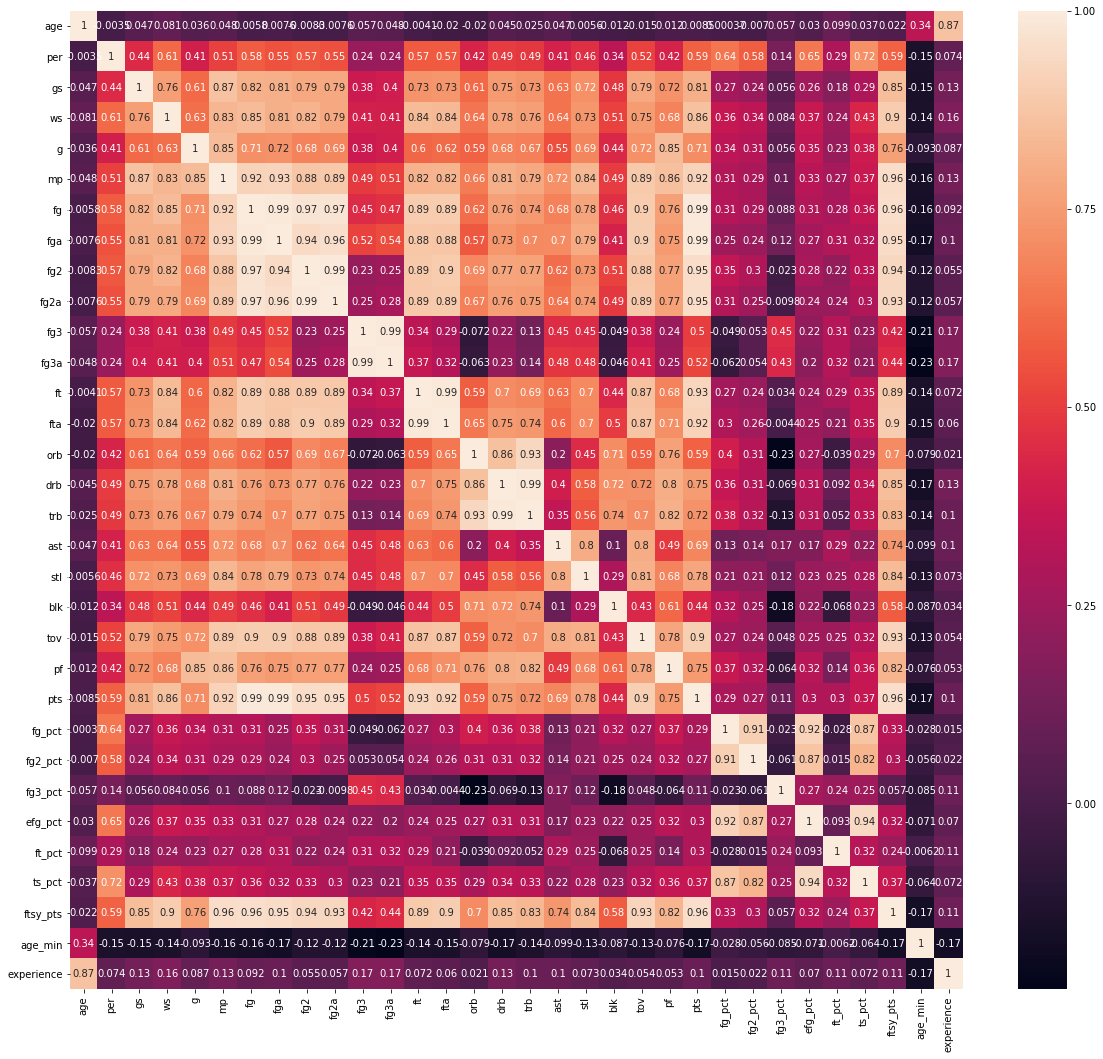

In [109]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True)

In [113]:
df[df.player == 'LeBron James']

,player,age,team_id,lg_id,per,gs,ws,season,g,mp,fg,fga,fg2,fg2a,fg3,fg3a,ft,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts,fg_pct,fg2_pct,fg3_pct,efg_pct,ft_pct,ts_pct,ftsy_pts,age_min,experience
9519,LeBron James,19,CLE,NBA,18.3,79,5.1,2003-04,79,3122,622,1492,559,1275,63,217,347,460,99,333,432,465,130,58,273,149,1654,0.417,0.438,0.290,0.438,0.754,0.488,3160.9,19,0
9520,LeBron James,20,CLE,NBA,25.7,80,14.3,2004-05,80,3388,795,1684,687,1376,108,308,477,636,111,477,588,577,177,52,262,146,2175,0.472,0.499,0.351,0.504,0.750,0.554,4171.1,19,1
9521,LeBron James,21,CLE,NBA,28.1,79,16.3,2005-06,79,3361,875,1823,748,1444,127,379,601,814,75,481,556,521,123,66,260,181,2478,0.480,0.518,0.335,0.515,0.738,0.568,4233.7,19,2
9522,LeBron James,22,CLE,NBA,24.5,78,13.7,2006-07,78,3190,772,1621,673,1311,99,310,489,701,83,443,526,470,125,55,250,171,2132,0.476,0.513,0.319,0.507,0.698,0.552,3758.2,19,3
9523,LeBron James,23,CLE,NBA,29.1,74,15.2,2007-08,75,3027,794,1642,681,1283,113,359,549,771,133,459,592,539,138,81,255,165,2250,0.484,0.531,0.315,0.518,0.712,0.568,4170.9,19,4
9524,LeBron James,24,CLE,NBA,31.7,81,20.3,2008-09,81,3054,789,1613,657,1229,132,384,594,762,106,507,613,587,137,93,241,139,2304,0.489,0.535,0.344,0.530,0.780,0.591,4369.1,19,5
9525,LeBron James,25,CLE,NBA,31.1,76,18.5,2009-10,76,2966,768,1528,639,1141,129,387,593,773,71,483,554,651,125,77,261,119,2258,0.503,0.560,0.333,0.545,0.767,0.604,4244.3,19,6
9526,LeBron James,26,MIA,NBA,27.3,79,15.6,2010-11,79,3063,758,1485,666,1206,92,279,503,663,80,510,590,554,124,50,284,163,2111,0.510,0.552,0.330,0.541,0.759,0.594,3888.0,19,7
9527,LeBron James,27,MIA,NBA,30.7,62,14.5,2011-12,62,2326,621,1169,567,1020,54,149,387,502,94,398,492,387,115,50,213,96,1683,0.531,0.556,0.362,0.554,0.771,0.605,3135.9,19,8
9528,LeBron James,28,MIA,NBA,31.6,76,19.3,2012-13,76,2877,765,1354,662,1100,103,254,403,535,97,513,610,551,129,67,226,110,2036,0.565,0.602,0.406,0.603,0.753,0.640,3956.5,19,9
